<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/Chest_X_Ray_Images_Classifications_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [61]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.metrics import classification_report

## Image Loading from kaggle

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Generator to load Images into batches

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)    

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


## Normalisation 

In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## CNN Model 

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                        

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
163/163 [==============================] - 737s 5s/step - loss: 1.3963 - accuracy: 0.8924 - val_loss: 113.4715 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 738s 5s/step - loss: 0.1738 - accuracy: 0.9444 - val_loss: 61.8544 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 737s 5s/step - loss: 0.1124 - accuracy: 0.9607 - val_loss: 9.8383 - val_accuracy: 0.5625
Epoch 4/10
163/163 [==============================] - 737s 5s/step - loss: 0.0805 - accuracy: 0.9716 - val_loss: 0.1642 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 737s 5s/step - loss: 0.0747 - accuracy: 0.9758 - val_loss: 0.4515 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 741s 5s/step - loss: 0.0982 - accuracy: 0.9686 - val_loss: 2.3942e-04 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 738s 5s/step - loss: 0.1383 - accuracy: 0.9641 - val_loss: 17.0046 - val_accuracy

## Evaluation of Model

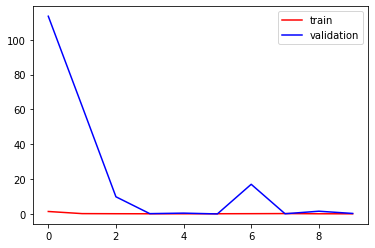

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

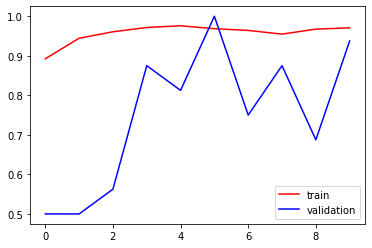

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Prediction Function 

In [19]:
import pathlib
data_dir = pathlib.Path('/content/chest_xray/test/')
data_dir

PosixPath('/content/chest_xray/test')

In [20]:
x_ray_images_dict = {
    'NORMAL': list(data_dir.glob('NORMAL/*')),
    'PNEUMONIA': list(data_dir.glob('PNEUMONIA/*')),
}

In [21]:
x_ray_classes_dict = {
    'NORMAL': 1,
    'PNEUMONIA': 0,
}

In [22]:
import random

In [47]:
def predictX_rayResult():
  Output = None
  random_key = random.choice(list(x_ray_classes_dict.keys()))
  path = x_ray_images_dict[random_key][random.randint(0, len(x_ray_images_dict[random_key]))]  
  test_img = cv2.imread(str(path))
  category = [value for value in  str(path).split('/') if value.isupper()][0] 
  test_img = cv2.resize(test_img,(256,256))
  test_input = test_img.reshape((1,256,256,3))
  if int(model.predict(test_input)[0][0]) == 1:
      Output = 'NORMAL'
  else:
      Output = 'PNEUMONIA'
  plt.imshow(test_img)
  print(f'Actual Class : {category}, Predicted Class :  {Output}')


1/1 [==============================] - 0s 55ms/step
Actual Class : NORMAL, Predicted Class :  NORMAL


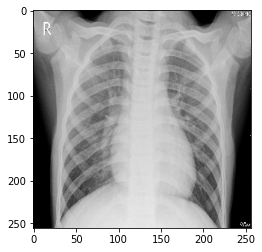

In [51]:
predictX_rayResult()

## Test set evaluation in model

In [52]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 624 files belonging to 2 classes.


In [53]:
# Normalize
def process(image,label): 
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = test_ds.map(process)

In [55]:
X = list()
y = list()

for image,label in test_ds:
  y.append(label)
  X.append(image)

In [60]:
model.evaluate(X[0],y[0])

1/1 [==============================] - 1s 1s/step - loss: 1.3273 - accuracy: 0.8750


[1.3273369073867798, 0.875]

In [64]:
pred =  model.predict(X[2])

1/1 [==============================] - 1s 1s/step


In [70]:
print(classification_report(y[2],pred.astype(int)))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.93      0.70      0.80        20

    accuracy                           0.78        32
   macro avg       0.79      0.81      0.78        32
weighted avg       0.83      0.78      0.78        32

